In [ ]:
from IPython.core.display import publish_display_data
!pip install pycaret
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt

## EDA

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/PedroPavanii/plane_crash/main/Plane%20Crashes.csv')

In [3]:
df = df.drop(['MSN', 'YOM', 'Time','Registration', 'Schedule', 'Flight no.', 'Crash location',
         'Other fatalities','Circumstances', 'Region', 'Flight phase'], axis=1)

In [4]:
df['Flight type'] = df['Flight type'].str.replace('Scheduled Revenue Flight', 'Airline Flight')
df['Flight type'] = df['Flight type'].str.replace('Survey / Patrol / Reconnaissance', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Bombing', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Fire fighting', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Survey / Patrol / Reconnaissance', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Aerial photography', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Delivery', 'Government')
df['Flight type'] = df['Flight type'].str.replace('Postal (mail)', 'Government')
df['Flight type'] = df['Flight type'].str.replace('Charter/Taxi (Non Scheduled Revenue Flight)', 'Private')
df['Flight type'] = df['Flight type'].str.replace('Executive/Corporate/Business', 'Private')
df['Flight type'] = df['Flight type'].replace('Postal (mail)', 'Government')
df['Flight type'] = df['Flight type'].replace('Charter/Taxi (Non Airline Flight)','Private')

<ipython-input-4-04c7f481efa5>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Flight type'] = df['Flight type'].str.replace('Postal (mail)', 'Government')
<ipython-input-4-04c7f481efa5>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Flight type'] = df['Flight type'].str.replace('Charter/Taxi (Non Scheduled Revenue Flight)', 'Private')


In [5]:
df = df.dropna()

## Modeling

In [7]:
from pycaret.regression import *
s = setup(df, target = 'PAX fatalities', session_id = 42)

,Description,Value
0,Session id,42
1,Target,PAX fatalities
2,Target type,Regression
3,Original data shape,"(27066, 13)"
4,Transformed data shape,"(27066, 45)"
5,Transformed train set shape,"(18946, 45)"
6,Transformed test set shape,"(8120, 45)"
7,Ordinal features,1
8,Numeric features,4
9,Categorical features,8


In [9]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.2895,5.3964,1.9241,0.9817,0.1910,0.1606,1.0630
huber,Huber Regressor,0.1382,9.1423,2.4273,0.9628,0.1774,0.0397,1.6610
lasso,Lasso Regression,0.7703,9.2939,2.6690,0.9621,0.4726,0.1766,1.3240
llar,Lasso Least Angle Regression,0.7702,9.2935,2.6689,0.9621,0.4726,0.1766,0.6470
par,Passive Aggressive Regressor,0.3826,9.4797,2.6034,0.9619,0.2470,0.0993,0.9370
en,Elastic Net,0.8072,9.9757,2.8561,0.9592,0.4610,0.1843,0.6790
lr,Linear Regression,1.0059,13.0402,3.4347,0.9457,0.4723,0.2832,1.5410
ridge,Ridge Regression,1.0056,13.0405,3.4348,0.9457,0.4722,0.2830,0.8260
br,Bayesian Ridge,1.0021,13.0479,3.4358,0.9456,0.4700,0.2805,0.6620
lightgbm,Light Gradient Boosting Machine,0.8271,14.4886,3.5590,0.9455,0.2289,0.2565,1.0910


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [10]:
print(best)

KNeighborsRegressor(n_jobs=-1)


In [14]:
tuned_model = tune_model(best,n_iter=20, fold = 3,choose_better = True,optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3129,9.8544,3.1392,0.9648,0.1995,0.1690
1,0.3250,3.9612,1.9903,0.9846,0.2002,0.1743
2,0.2928,2.6394,1.6246,0.9865,0.2147,0.1899
Mean,0.3102,5.4850,2.2514,0.9786,0.2048,0.1777
Std,0.0133,3.1364,0.6453,0.0098,0.0070,0.0089


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [15]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

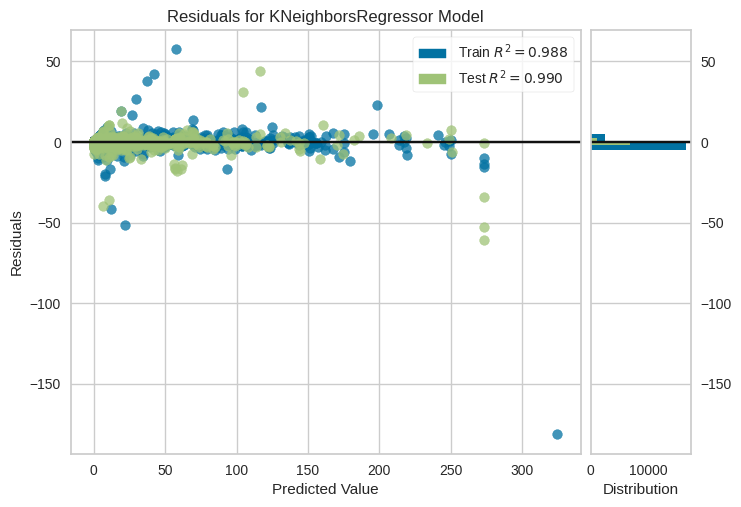

In [16]:
plot_model(best, plot = 'residuals')